In [6]:
# import pacckages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow	import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.metrics import r2_score


# Build the model

In [7]:

# building the model
def design_model(features):
  model = Sequential(name = "Admission_Prediction")

  input = layers.InputLayer(input_shape = (features.shape[1], )) # create input layer
  model.add(input) # add input layer to model

  model.add(Dense(64, activation = "relu")) # create and add hidden layer with relu activation funcntion

  model.add(Dense(1)) # add output layer with one neuron for 1 output
  #add optimizer Adam
  opt = Adam(learning_rate = 0.01)
  model.compile(loss='mse',  metrics=['mae'], optimizer=opt)
  return model


# Data Preprocessing and Model Fitting

In [8]:
# load data 
dataset = pd.read_csv('admissions_data.csv')
# print(dataset.head())
# data spliting into features and labels
features = dataset.iloc[:, 1:-1] # select up to last column dropping serial number
labels = dataset.iloc[:, -1] # select last column

# split data into training and test sets
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state=20)

# standardize
numerical_features = features.select_dtypes(include=['float64', 'int64']) # select all list of numerical data

numerical_columns = numerical_features.columns # set columns

# initializes a ColumnTransformer
ct = ColumnTransformer([("scale", StandardScaler(), numerical_columns)], remainder='passthrough') 

features_train_scaled = ct.fit_transform(features_train) #fit the standadizer to the training data 

features_test_scaled = ct.transform(features_test) #applied the trained standadizer on the test data

#ColumnTransformer returns numpy arrays. Convert the features to dataframes
features_train_scale = pd.DataFrame(features_train_scaled, columns = numerical_columns)

features_test_scale = pd.DataFrame(features_test_scaled, columns = numerical_columns)

#invoke the function for our model design
model = design_model(features_train_scaled)

# EarlyStopping fucntion
stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=40)
# fit the model
history = model.fit(features_train_scaled, labels_train, epochs = 40, batch_size = 4, verbose = 1,validation_split= 0.2, callbacks=[stop])

# evaluate model
val_mse, val_mae = model.evaluate(features_test_scaled, labels_test, verbose = 0)

# model.predict(features_test_scaled, labels_test)
# model.r2_score(features_test_scaled, labels_test)
print(model.summary()) # print summary of the sequential model

print("MSE: ", val_mse) # print root mean squared errors 

print("MAE: ", val_mae) # print mean absolute errors  


Epoch 1/40
80/80 [==============================] - 0s 2ms/step - loss: 0.2286 - mae: 0.3350 - val_loss: 0.0106 - val_mae: 0.0827
Epoch 2/40
80/80 [==============================] - 0s 2ms/step - loss: 0.0092 - mae: 0.0753 - val_loss: 0.0061 - val_mae: 0.0607
Epoch 3/40
80/80 [==============================] - 0s 953us/step - loss: 0.0080 - mae: 0.0718 - val_loss: 0.0047 - val_mae: 0.0537
Epoch 4/40
80/80 [==============================] - 0s 963us/step - loss: 0.0057 - mae: 0.0577 - val_loss: 0.0070 - val_mae: 0.0670
Epoch 5/40
80/80 [==============================] - 0s 922us/step - loss: 0.0054 - mae: 0.0576 - val_loss: 0.0065 - val_mae: 0.0650
Epoch 6/40
80/80 [==============================] - 0s 951us/step - loss: 0.0054 - mae: 0.0570 - val_loss: 0.0051 - val_mae: 0.0527
Epoch 7/40
80/80 [==============================] - 0s 939us/step - loss: 0.0047 - mae: 0.0551 - val_loss: 0.0045 - val_mae: 0.0541
Epoch 8/40
80/80 [==============================] - 0s 929us/step - loss: 0.0053

# Plotting

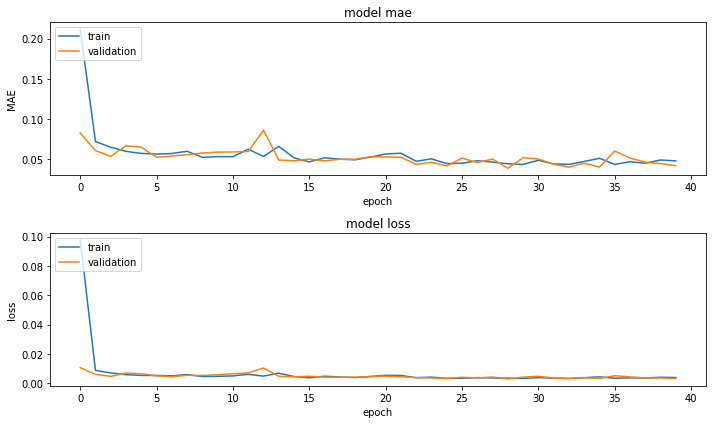

In [11]:


# model performance plotting
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(history.history['mae'])
ax1.plot(history.history['val_mae'])
ax1.set_title('model mae')
ax1.set_ylabel('MAE')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'validation'], loc='upper left')
 
  # Plot loss and val_loss over each epoch
ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'validation'], loc='upper left')
 
# used to keep plots from overlapping each other  
fig.tight_layout()
fig.savefig('plots.png')


# Make predictions

In [13]:
prediction = model.predict(features_test_scaled) # make predictions

r2_score(labels_test, prediction) # print accuracy

0.768654868557708